In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pathlib import Path
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA


In [18]:
def createDirAndPath(fileDir, name):
    PATH = Path(fileDir)
    PATH.mkdir(parents = True, exist_ok= True)
    SAVE_PATH = PATH / name
    return SAVE_PATH

## Data preprocessing

In [19]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 21', 'MALE',
       'FAVC = yes ', 'FCVC 1/=1 : never', 'SMOKE = yes ',
       'CALC = fequently, always ', 'FAF<1 : I do not have ',
       'BMI : overweight + obese','risk factors ','score ', 'score','BMI STATUS'],axis = 1)

In [20]:
for i, value in enumerate(df['At risk'].isnull()):
    if value == True:
        df.iloc[i,-1] = "Not at risk"
df["Age"] = df["Age"].str.replace(r'\[.*\]', '', regex=True).astype(float)
X = df.head(500).drop('At risk', axis = 1) #the first 500 rows are real data from real people while the rest were synthetic data
y = df.head(500)['At risk']

In [21]:
X_train_values, X_test_values, y_train_values, y_test_values = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [22]:
X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [23]:
Ordinal = OrdinalEncoder()
X_train = pd.DataFrame(columns = X.columns, data = X_train_values)
X_train[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']] = Ordinal.fit_transform(X_train[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad']])
X_test = pd.DataFrame(columns = X.columns, data = X_test_values)
X_test[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad']] = Ordinal.transform(X_test[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad']])
le = LabelEncoder()
y_train = le.fit_transform(y_train_values)
y_test = le.transform(y_test_values)

## Data distribution

In [24]:
O = OrdinalEncoder()
X[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']] = O.fit_transform(X[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad']])


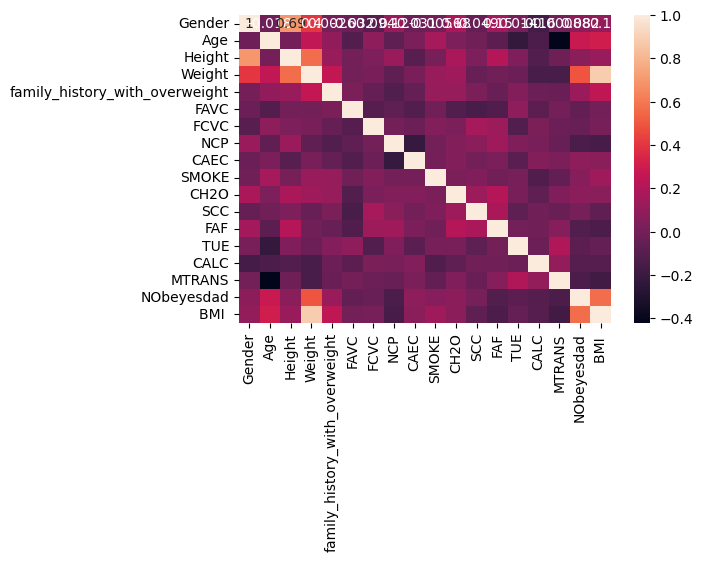

In [25]:
sns.heatmap(X.corr(), annot = True)
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

In [26]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI ', 'At risk'],
      dtype='object')

In [27]:
O2= OrdinalEncoder()
dftest = df.head(500)
dftest[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad', 'At risk']] = O.fit_transform(dftest[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad', 'At risk']])

/var/folders/4d/2k0d7nz53j558t93xswwt2km0000gp/T/ipykernel_56074/3785285326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad', 'At risk']] = O.fit_transform(dftest[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC','MTRANS','NObeyesdad', 'At risk']])


In [28]:

scaled = MinMaxScaler().fit_transform(dftest)
dftest_scaled = pd.DataFrame(columns = dftest.columns, data = scaled)


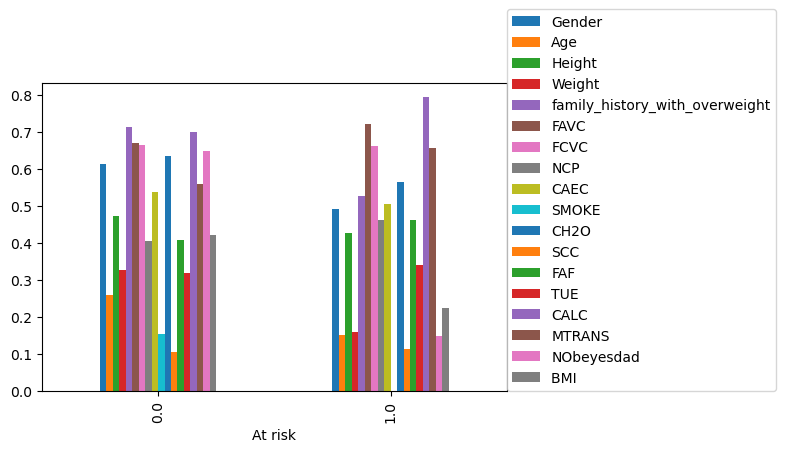

In [29]:
dftest_scaled.groupby('At risk').mean().sort_values(by = 'At risk').plot(kind = 'bar')
plt.legend(loc = (1,0))

In [30]:
le = LabelEncoder()
y = le.fit_transform(y)

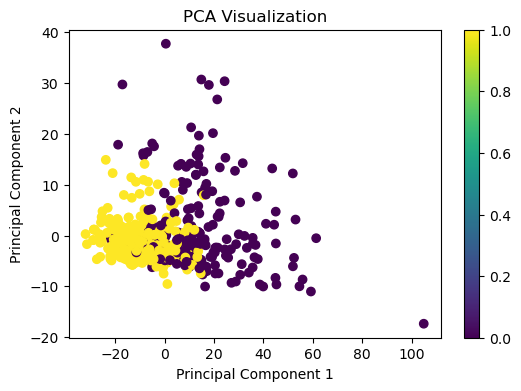

In [31]:

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y) 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar()
plt.show()

## Random Forest Classification 

In [32]:
rf = RandomForestClassifier(random_state=25)
params = {
    'criterion': ['gini','entropy','log_loss'],
    'n_estimators' : [100,200,300], 
    'max_depth' : [10,11,12] 

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train , y_train)
best_rf = clf.best_estimator_
whole_X_train = pd.DataFrame(clf.cv_results_)
whole_X_train.sort_values(by = 'rank_test_score', inplace = True)
whole_X_train 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.080254,0.000485,0.004363,0.000042,entropy,11,200,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
24,0.040735,0.000252,0.002595,0.000043,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
23,0.120134,0.000740,0.006027,0.000081,log_loss,11,300,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
22,0.080898,0.001405,0.004422,0.000218,log_loss,11,200,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
21,0.040344,0.000268,0.002541,0.000052,log_loss,11,100,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
20,0.118938,0.000530,0.006063,0.000062,log_loss,10,300,"{'criterion': 'log_loss', 'max_depth': 10, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
19,0.079589,0.000724,0.004232,0.000143,log_loss,10,200,"{'criterion': 'log_loss', 'max_depth': 10, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
18,0.040198,0.000377,0.002524,0.000070,log_loss,10,100,"{'criterion': 'log_loss', 'max_depth': 10, 'n_...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
17,0.118736,0.000693,0.005946,0.000105,entropy,12,300,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
16,0.079848,0.000352,0.004282,0.000134,entropy,12,200,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1


In [33]:
rf_data = {'Architecuture': 'Random Forest', 'AUC': roc_auc_score(y_test, best_rf.predict(X_test)), 'Recall': recall_score(y_test, best_rf.predict(X_test)), 'Precision': precision_score(y_test, best_rf.predict(X_test)), 'Accuracy': accuracy_score(y_test, best_rf.predict(X_test)), 'F1 score': f1_score(y_test, best_rf.predict(X_test)), 'Time taken': whole_X_train['mean_fit_time'].mean(), 'Parameters': 'test'}

In [34]:
results_df = pd.DataFrame(rf_data, index = [0])

In [35]:
results_df

,Architecuture,AUC,Recall,Precision,Accuracy,F1 score,Time taken,Parameters
0,Random Forest,0.987179,1.0,0.983871,0.99,0.99187,0.080778,test


## Support vector machine

In [36]:
from sklearn import svm
support_vector = svm.SVC(random_state=25)
params = {
    'kernel': ['linear','poly','rbf'],
    'gamma' : [0.1,1,10],
    # 'C' : [0.1,1,10,100], 
    'degree' : [1,2,3],

}
clf = GridSearchCV(support_vector,param_grid=params,scoring = 'recall')
clf.fit(X_train , y_train)
best_svm = clf.best_estimator_
SVM_data = pd.DataFrame(clf.cv_results_)
SVM_data.sort_values(by = 'rank_test_score', inplace = True)

In [37]:
best_svm 

SVC(degree=1, gamma=0.1, kernel='poly', random_state=25)

In [38]:
results_df.loc[1] = ['SVM', roc_auc_score(y_test, best_svm.predict(X_test)), recall_score(y_test, best_svm.predict(X_test)), precision_score(y_test, best_svm.predict(X_test)), accuracy_score(y_test, best_svm.predict(X_test)), f1_score(y_test, best_svm.predict(X_test)), SVM_data['mean_fit_time'].mean(), best_svm.get_params().values()]

In [39]:
results_df

,Architecuture,AUC,Recall,Precision,Accuracy,F1 score,Time taken,Parameters
0,Random Forest,0.987179,1.00000,0.983871,0.99,0.991870,0.080778,test
1,SVM,0.924128,0.95082,0.935484,0.93,0.943089,0.005078,"(1.0, False, 200, None, 0.0, ovr, 1, 0.1, poly..."


## Gradient Boosting

In [40]:

XG = GradientBoostingClassifier(random_state=25)
params = {
    'n_estimators' : [100,200,300], 
    'max_depth' : [10,11,12],
    'learning_rate' : [0.1,0.01,0.001],
    'criterion' : ['friedman_mse','sqaured_error'],
}
clf = GridSearchCV(XG ,param_grid=params,scoring = 'recall')
clf.fit(X_train , y_train)
best_XG = clf.best_estimator_
XG_data = pd.DataFrame(clf.cv_results_)
XG_data.sort_values(by = 'rank_test_score', inplace = True)
XG_data 

/Users/Parith/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Parith/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Parith/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/Users/Parith/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_param

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.120618,0.001216,0.001150,0.000040,friedman_mse,0.001,12,300,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
25,0.081693,0.000889,0.001023,0.000031,friedman_mse,0.001,12,200,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
24,0.041040,0.000750,0.000950,0.000035,friedman_mse,0.001,12,100,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
23,0.123602,0.007154,0.001149,0.000038,friedman_mse,0.001,11,300,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
22,0.081487,0.000911,0.001111,0.000050,friedman_mse,0.001,11,200,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
21,0.040721,0.000605,0.000913,0.000022,friedman_mse,0.001,11,100,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
20,0.119554,0.001457,0.001179,0.000046,friedman_mse,0.001,10,300,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
19,0.080442,0.001190,0.001035,0.000032,friedman_mse,0.001,10,200,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
18,0.041087,0.000227,0.000934,0.000041,friedman_mse,0.001,10,100,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
17,0.100862,0.001604,0.001056,0.000079,friedman_mse,0.01,12,300,"{'criterion': 'friedman_mse', 'learning_rate':...",1.0,1.0,1.0,0.978261,1.0,0.995652,0.008696,10


In [41]:
results_df.loc[2] = ['Gradient Boosting', roc_auc_score(y_test, best_XG.predict(X_test)), recall_score(y_test, best_XG.predict(X_test)), precision_score(y_test, best_XG.predict(X_test)), accuracy_score(y_test, best_XG.predict(X_test)), f1_score(y_test, best_XG.predict(X_test)), XG_data['mean_fit_time'].mean(), best_XG.get_params().values()]

In [42]:

XG_IF = pd.DataFrame(best_XG.feature_importances_,index = X.columns ,columns=['importance'])
XG_IF.sort_values('importance', ascending = False, inplace=True)
XG_IF

,importance
NObeyesdad,3.853064e-01
BMI,3.840131e-01
SMOKE,1.048030e-01
CALC,6.149020e-02
Age,3.881186e-02
Height,1.284771e-02
Gender,1.272774e-02
Weight,8.094971e-16
MTRANS,1.005659e-16
FAF,9.556120e-17


In [43]:
results_df

,Architecuture,AUC,Recall,Precision,Accuracy,F1 score,Time taken,Parameters
0,Random Forest,0.987179,1.00000,0.983871,0.99,0.991870,0.080778,test
1,SVM,0.924128,0.95082,0.935484,0.93,0.943089,0.005078,"(1.0, False, 200, None, 0.0, ovr, 1, 0.1, poly..."
2,Gradient Boosting,0.500000,1.00000,0.610000,0.61,0.757764,0.034218,"(0.0, friedman_mse, None, 0.001, log_loss, 10,..."


## Naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
params = {
    'var_smoothing' : [1e-9,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1],
}
clf = GridSearchCV(nb ,param_grid=params,scoring = 'recall')
clf.fit(X_train , y_train)
best_nb = clf.best_estimator_
nb_data = pd.DataFrame(clf.cv_results_)
nb_data.sort_values(by = 'rank_test_score', inplace = True)
nb_data 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001288,0.000168,0.000985,0.000198,0.0,{'var_smoothing': 1e-09},1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1
1,0.000797,0.000105,0.000744,0.000059,0.0,{'var_smoothing': 1e-10},1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1
2,0.000707,0.000091,0.000647,0.000051,0.0,{'var_smoothing': 1e-08},1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1
3,0.000603,0.000026,0.000624,0.000039,0.0,{'var_smoothing': 1e-07},1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1
4,0.000615,0.000033,0.000631,0.000033,0.000001,{'var_smoothing': 1e-06},1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1
5,0.000604,0.000024,0.000589,0.000015,0.00001,{'var_smoothing': 1e-05},1.000000,1.000000,1.000000,1.0,0.978261,0.995652,0.008696,6
6,0.000589,0.000014,0.000602,0.000039,0.0001,{'var_smoothing': 0.0001},1.000000,1.000000,1.000000,1.0,0.956522,0.991304,0.017391,7
10,0.000612,0.000022,0.000633,0.000042,1,{'var_smoothing': 1},1.000000,1.000000,0.956522,1.0,1.000000,0.991304,0.017391,7
7,0.000610,0.000030,0.000598,0.000015,0.001,{'var_smoothing': 0.001},1.000000,1.000000,1.000000,1.0,0.934783,0.986957,0.026087,9
8,0.000652,0.000049,0.000675,0.000046,0.01,{'var_smoothing': 0.01},1.000000,0.978261,0.978261,1.0,0.934783,0.978261,0.023814,10


In [45]:
results_df.loc[3] = ['Naive Bayes', roc_auc_score(y_test, best_nb.predict(X_test)), recall_score(y_test, best_nb.predict(X_test)), precision_score(y_test, best_nb.predict(X_test)), accuracy_score(y_test, best_nb.predict(X_test)), f1_score(y_test, best_nb.predict(X_test)), nb_data['mean_fit_time'].mean(), best_nb.get_params().values()]

## ANN 

In [46]:
import torch

# Setup device agnostic code
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42

In [47]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features = len(X.columns), out_features = 8)
        self.linear2 = nn.Linear(in_features = 8, out_features = 16)
        self.linear3 = nn.Linear(in_features = 16, out_features = 32)
        self.output_layer = nn.Linear(in_features = 32, out_features = len(np.unique(y_train))-1)
        self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return self.output_layer(self.relu(self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))))

# Instantiate the model
## Your code here ##
model = MoonModelV0().to(device)

In [48]:
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=10).to(device) # send accuracy function to device


In [49]:
# Setup loss function
loss_fn = nn.CrossEntropyLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [50]:
import numpy as np
import torch
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device


# Loop through the data
for epoch in range(epochs):
  ### Training
  model.train()

  # 1. Forward pass (logits output)
  y_logits = model(torch.from_numpy(X_train.to_numpy().astype('float32')).to(device))
  # Turn logits into prediction probabilities
  y_preds_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_preds_probs)

  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  loss = loss_fn(y_logits.squeeze(-1), torch.from_numpy(y_train).to(torch.float32).to(device))
  # Calculate the accuracy
  acc = acc_fn(y_pred.squeeze(-1), torch.from_numpy(y_train).to(torch.float32).to(device)) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model(torch.from_numpy(X_test.to_numpy().astype('float32')).to(device))
    # Turn the test logits into prediction labels
    test_pred_probs = torch.sigmoid(test_logits)
    test_loss = loss_fn(test_logits.squeeze(-1),  torch.from_numpy(y_test).to(torch.float32).to(device))
    # 2. Caculate the test loss/acc
    test_acc = acc_fn(torch.round(test_pred_probs).squeeze(-1), torch.from_numpy(y_test).to(torch.float32).to(device))

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1354.50793, Acc: 0.43 | Test loss: 6036.51660, Test Acc: 0.39
Epoch: 100 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 200 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 300 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 400 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 500 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 600 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 700 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 800 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61
Epoch: 900 | Loss: 1378.03687, Acc: 0.57 | Test loss: 280.91541, Test Acc: 0.61


In [51]:
# results_df = pd.read_csv('results_lifestyle_only.csv')
data = {'Architecuture': 'Neural Network', 'AUC': roc_auc_score(y_test, torch.round(test_pred_probs.to('cpu')).squeeze(-1)), 'Recall': recall_score(y_test, torch.round(test_pred_probs.to('cpu')).squeeze(-1)), 'Precision': precision_score(y_test, torch.round(test_pred_probs.to('cpu')).squeeze(-1)), 'Accuracy': accuracy_score(y_test, torch.round(test_pred_probs.to('cpu')).squeeze(-1)), 'F1 score': f1_score(y_test, torch.round(test_pred_probs.to('cpu')).squeeze(-1)), 'Time taken': 'NA', 'Parameters': 'NA'}
# results_df.loc[3] = data


In [52]:
results_df

,Architecuture,AUC,Recall,Precision,Accuracy,F1 score,Time taken,Parameters
0,Random Forest,0.987179,1.00000,0.983871,0.99,0.991870,0.080778,test
1,SVM,0.924128,0.95082,0.935484,0.93,0.943089,0.005078,"(1.0, False, 200, None, 0.0, ovr, 1, 0.1, poly..."
2,Gradient Boosting,0.500000,1.00000,0.610000,0.61,0.757764,0.034218,"(0.0, friedman_mse, None, 0.001, log_loss, 10,..."
3,Naive Bayes,0.974359,1.00000,0.968254,0.98,0.983871,0.000702,"(None, 1e-09)"


In [53]:
results_df.to_csv('results_lifestyle_only.csv')

In [54]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI ', 'At risk'],
      dtype='object')